In [ ]:
import pandas as pd

#Importing other files

import matplotlib.pyplot as plt
import seaborn as sns

# Built-in library
import itertools
import typing as tp
import re
from typing import Any, Optional, Sequence, Union

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000

pd.options.display.max_colwidth = 1_000

In [ ]:
df = pd.read_csv('mock_data (1).csv', encoding='Latin-1')
df.head()

,User_id,Food_name,Food_categories,Food_price,Restaurant,Rating,Review,Food_description,restaurant_location
0,5367,Spring Rolls,Starters and Appetizers,400,Naija Delights,3,Delicious food! Loved the flavors.,"('Spring Rolls are crispy pastry rolls filled with a mixture of vegetables, meat, or seafood. They are deep-fried until golden and are often served as appetizers or snacks.',)",Mainland
1,6583,Zobo (Hibiscus) Drink,Desserts and Beverages,500,Suya Palace,5,Great service and quality. Highly recommend.,"('Zobo Drink is a refreshing Nigerian beverage made from dried hibiscus petals, ginger, and other spices. It is usually sweetened with sugar or natural sweeteners and served chilled.',)",Mainland
2,5016,Ewa Agoyin with Agege Bread,Nigerian Delicacies,800,Naija Delights,3,Good portion size and value for money.,"('Ewa Agoyin is a spicy Nigerian bean stew made with cooked beans and a special sauce made from palm oil, onions, and peppers. It is typically served with Agege Bread, a soft and fluffy bread popular in Nigeria.',)",Mainland
3,2144,Fisherman's Soup with Eba,Seafood Delights,3200,Taste of Lagos,1,Food arrived late and order was incorrect.,"(""Fisherman's Soup is a spicy Nigerian soup made with a variety of seafood such as fish, prawns, and crabs. It is often enjoyed with Eba, a dough-like accompaniment made from cassava."",)",Island
4,3329,Puff Puff,Starters and Appetizers,300,Naija Delights,3,Delicious food! Loved the flavors.,"('Puff Puff is a popular Nigerian snack made from a simple batter of flour, sugar, yeast, and water. It is deep-fried until golden brown and has a fluffy, doughnut-like texture.',)",Mainland


**Exploratory Data Analysis**

In [ ]:
def eda(data: pd.DataFrame)-> pd.DataFrame or pd.Series:
    """This function reads a csv file and 
    gives the summary statisticts of a dataset
    
    Params: 
    data (Dataframe) : The data
    
    Returns
    data: Pd.Dataframe or pd.Series 
    """
    print(f"""
          ===dtypes===
          
          {data.dtypes}
          
          ===NaN Values===
          
          {data.isna().sum()}
          
          ====shape=====
          
          The dataset has {data.shape[0]} rows and {data.shape[1]} columns
          
          ===Unique Values in each feature===
          
          {data.nunique()}
          
          
          ====head====
          
          
          
          """)
    return data.head()

In [ ]:
eda(df)


          ===dtypes===
          
          User_id                 int64
Food_name              object
Food_categories        object
Food_price              int64
Restaurant             object
Rating                  int64
Review                 object
Food_description       object
restaurant_location    object
dtype: object
          
          ===NaN Values===
          
          User_id                0
Food_name              0
Food_categories        0
Food_price             0
Restaurant             0
Rating                 0
Review                 0
Food_description       0
restaurant_location    0
dtype: int64
          
          ====shape=====
          
          The dataset has 100000 rows and 9 columns
          
          ===Unique Values in each feature===
          
          User_id                9000
Food_name                73
Food_categories          21
Food_price               20
Restaurant                4
Rating                    5
Review                   10
F

,User_id,Food_name,Food_categories,Food_price,Restaurant,Rating,Review,Food_description,restaurant_location
0,5367,Spring Rolls,Starters and Appetizers,400,Naija Delights,3,Delicious food! Loved the flavors.,"('Spring Rolls are crispy pastry rolls filled with a mixture of vegetables, meat, or seafood. They are deep-fried until golden and are often served as appetizers or snacks.',)",Mainland
1,6583,Zobo (Hibiscus) Drink,Desserts and Beverages,500,Suya Palace,5,Great service and quality. Highly recommend.,"('Zobo Drink is a refreshing Nigerian beverage made from dried hibiscus petals, ginger, and other spices. It is usually sweetened with sugar or natural sweeteners and served chilled.',)",Mainland
2,5016,Ewa Agoyin with Agege Bread,Nigerian Delicacies,800,Naija Delights,3,Good portion size and value for money.,"('Ewa Agoyin is a spicy Nigerian bean stew made with cooked beans and a special sauce made from palm oil, onions, and peppers. It is typically served with Agege Bread, a soft and fluffy bread popular in Nigeria.',)",Mainland
3,2144,Fisherman's Soup with Eba,Seafood Delights,3200,Taste of Lagos,1,Food arrived late and order was incorrect.,"(""Fisherman's Soup is a spicy Nigerian soup made with a variety of seafood such as fish, prawns, and crabs. It is often enjoyed with Eba, a dough-like accompaniment made from cassava."",)",Island
4,3329,Puff Puff,Starters and Appetizers,300,Naija Delights,3,Delicious food! Loved the flavors.,"('Puff Puff is a popular Nigerian snack made from a simple batter of flour, sugar, yeast, and water. It is deep-fried until golden brown and has a fluffy, doughnut-like texture.',)",Mainland


From the above, the exploration sjows the structure and format of the data set, and also checked for missing values, 
from the data set, there are no missing values.

The data has 100000 rows and 9 columns. 
There are 73 food types that can be ordered from 4 unique restaurants and there are about 63,337 people that have used the mealy app so far. There are only three numerical variables in the dataset which are the `User_id` , `Food_price` and `Rating`

In [ ]:
df.describe()

,User_id,Food_price,Rating
count,100000.000000,100000.000000,100000.000000
mean,5490.223950,1754.926000,3.954680
std,2600.527674,974.792304,0.996331
min,1000.000000,200.000000,1.000000
25%,3231.750000,800.000000,4.000000
50%,5482.000000,1800.000000,4.000000
75%,7739.000000,2500.000000,5.000000
max,9999.000000,3800.000000,5.000000


From the description of the numerical variables, the average price of food on the app is ₦1,610 and average rating of foods ordered from resaturants is about 4 stars.

**Categories of Food Available on the APP**

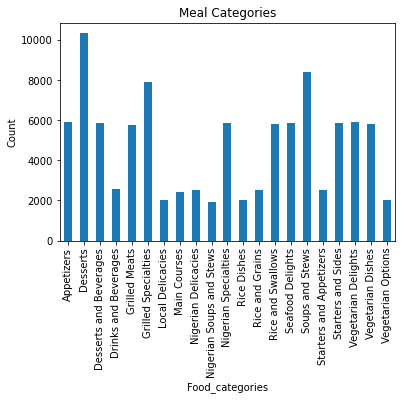

In [ ]:
# group by food_categories
category_counts = df.groupby('Food_categories').size()

# Visualizing meal category using bar chart
category_counts.plot(kind='bar')
plt.xlabel('Food_categories')
plt.ylabel('Count')
plt.title('Meal Categories')
plt.show()

From the visualization above, it can be deduced that the most ordered food category is from `Desserts` which is followed by `Soups and Stews` and `Grilled Specialities`.

**What are the most ordered Food**

In [ ]:
df["Food_name"].value_counts().head()

Jollof Rice with Grilled Chicken    4744
Egusi Soup with Pounded Yam         4652
Peppered Snails                     3519
Fried Rice with Beef Stir-Fry       3284
Plantain Chips                      2581
Name: Food_name, dtype: int64

The most ordered Food_type is `Jollof Rice with Grilled Chicken` with 4744 orders.

Text(0.5, 1.0, 'distribution of Food_price')

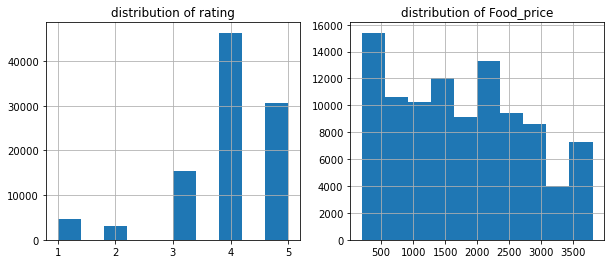

In [ ]:
#plot of the distribition of Rating and Food_price

#create a subplots with 1 row and 2 columns with figsize of 10,4
fig,ax=plt.subplots(1,2,figsize=(10,4))

#Histogram plot on the first axis
df['Rating'].hist(ax=ax[0])
ax[0].set_title('distribution of rating') #title of the plot

#Histogram plot of Food Price on the second axis
df['Food_price'].hist(ax=ax[1])
ax[1].set_title('distribution of Food_price')

From the above visualization, it can be seen that the most common ratings for food is 4 and the people tend to order food with lower food price.

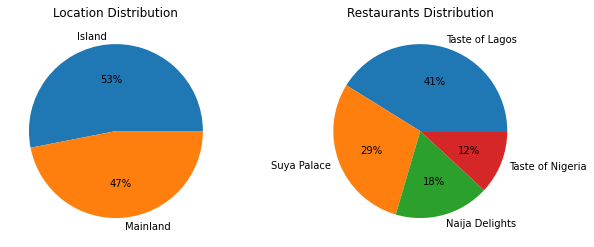

In [ ]:
#Pie chart plot of the locationa nd  Restaurant distribution

fig,ax=plt.subplots(1,2,figsize=(10,4))
ax[0].pie(x=df["restaurant_location"].value_counts() ,labels=df["restaurant_location"].value_counts().index, autopct='%.f%%')
ax[0].set_title('Location Distribution')
ax[1].pie(x=df["Restaurant"].value_counts() ,labels=df["Restaurant"].value_counts().index, autopct='%.f%%')
ax[1].set_title('Restaurants Distribution')
plt.show()

# Multivariate Analysis : comparing the Food Price with that of other variables

** price and location

** Price and Restaurant

** Restaurants and Rating. positve and negative rating

** Restaurants with the Food type most frequently ordered

### What restaurants are most expensive on average and is there a relationship with the ratings?
### Comparing the location of a restaurant and its average price.

In [ ]:
df.groupby(['restaurant_location','Restaurant']).agg({'Food_price': 'mean', 'Rating': 'mean'}).sort_values(by='Rating',ascending=False)

Food_price    Rating
restaurant_location Restaurant                             
Mainland            Naija Delights     978.066746  3.960791
                    Suya Palace       1236.545554  3.958885
Island              Taste of Nigeria  1784.341906  3.954278
                    Taste of Lagos    2448.191600  3.949185

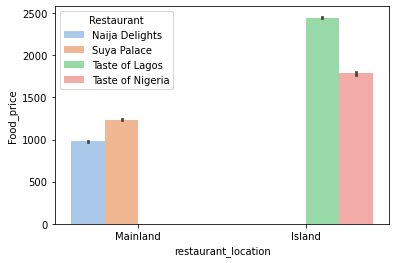

In [ ]:
# get the relationship between Restaurant Location and Price
sns.barplot(x='restaurant_location', y='Food_price', data=df, palette='pastel', hue='Restaurant')
plt.show()

The prices of food from restaurants on the Island is higher than that of those on the Mainland

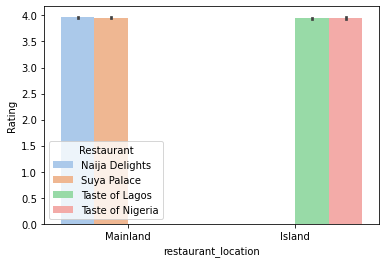

In [ ]:
# get the relationship between Restaurant Location and Rating
sns.barplot(x='restaurant_location', y='Rating', data=df, palette='pastel', hue='Restaurant')
plt.show()

The ratings of Restaurants on the Mainland and Island are the same

In [ ]:
# filtering data base on positive and negative review

positive_reviews = df[df['Rating'] > 2] #any rating greater than 2 is regarded as a positive review
negative_reviews = df[df['Rating'] <= 2]  #any rating greater less than 3 is regarded as negative ratings

#using the value_counts() function to check for the ratings of resturants 
positive_counts = positive_reviews['Restaurant'].value_counts()
negative_counts = negative_reviews['Restaurant'].value_counts()


counts = pd.concat([positive_counts, negative_counts], axis=1)
counts.columns = ['Positive Ratings', 'Negative Ratings']
print(counts)

                  Positive Ratings  Negative Ratings
Taste of Lagos               37980              3189
Suya Palace                  27064              2220
Naija Delights               16346              1303
Taste of Nigeria             11016               882


In [ ]:
from collections import Counter
# Checking for the most Common Reviewa
most_common = Counter(df["Review"]).most_common(20)
most_common

[('Great service and quality. Highly recommend.', 18523),
 ('Good portion size and value for money.', 18513),
 ('Amazing experience. Will definitely order again.', 18512),
 ('Delicious food! Loved the flavors.', 18460),
 ('Fresh ingredients and authentic taste.', 18398),
 ('Food was cold and tasteless. Disappointed.', 1565),
 ('Slow delivery and poor customer service.', 1531),
 ('Food arrived late and order was incorrect.', 1521),
 ('Overpriced for the quality received.', 1494),
 ("Unappetizing presentation. Won't order again.", 1483)]

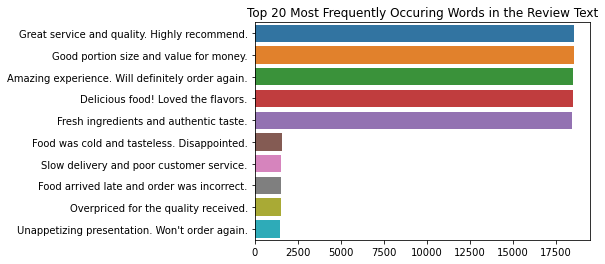

In [ ]:
words = []
freq = []
for word, count in most_common:
    words.append(word)
    freq.append(count)
    
    
sns.barplot(x=freq, y=words)
plt.title("Top 20 Most Frequently Occuring Words in the Review Text")
plt.show()

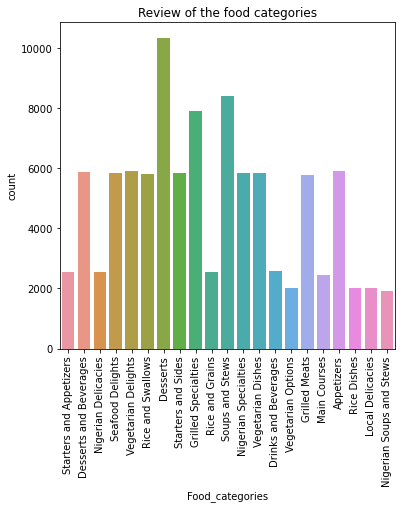

In [ ]:
#Checking for the most common reviews by food category
plt.figure(figsize=(6, 6))
sns.countplot(x=df["Food_categories"])
plt.xticks(rotation=90)
plt.title("Review of the food categories")
plt.show()

From the above, deserts has the highest Desserts followed by Soups and Stews, and Grilled Specialties

In [ ]:
# Dictionary of English Contractions
contractions_dict = {
    "ain't": "are not",
    "'s": " is",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "that'd": "that would",
    "that'd've": "that would have",
    "there'd": "there would",
    "there'd've": "there would have",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what've": "what have",
    "when've": "when have",
    "where'd": "where did",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who've": "who have",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
}

# Regular expression for finding contractions
contractions_re = re.compile("(%s)" % "|".join(contractions_dict.keys()))


# Function for expanding contractions
def expand_contractions(text, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]

    return contractions_re.sub(replace, text)


# Expanding Contractions in the reviews
df["Food_description"] = df["Food_description"].apply(lambda x: expand_contractions(x))

In [ ]:
df["Cleaned_Review"] = df["Food_description"].apply(lambda x: x.lower())

In [ ]:
import string

df["Cleaned_Review"] = df["Cleaned_Review"].apply(
    lambda x: re.sub("[%s]" % re.escape(string.punctuation), "", x)
)

# Removing extra spaces
df["Cleaned_Review"] = df["Cleaned_Review"].apply(lambda x: re.sub(" +", " ", x))

df["Cleaned_Review"].head()

0                                           spring rolls are crispy pastry rolls filled with a mixture of vegetables meat or seafood they are deepfried until golden and are often served as appetizers or snacks
1                                zobo drink is a refreshing nigerian beverage made from dried hibiscus petals ginger and other spices it is usually sweetened with sugar or natural sweeteners and served chilled
2    ewa agoyin is a spicy nigerian bean stew made with cooked beans and a special sauce made from palm oil onions and peppers it is typically served with agege bread a soft and fluffy bread popular in nigeria
3                                fisherman is soup is a spicy nigerian soup made with a variety of seafood such as fish prawns and crabs it is often enjoyed with eba a doughlike accompaniment made from cassava
4                                         puff puff is a popular nigerian snack made from a simple batter of flour sugar yeast and water it is deepfried until g

In the above steps i cleaned the review by removing punctuation marks and making all reviews lower case.

In [ ]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words

df["lemmatized"] = df["Cleaned_Review"].apply(
    lambda x: " ".join(
        [token.lemma_ for token in list(nlp(x)) if (token.is_stop == False)]
    )
)

Tokenize review above and enable the application of other functions, such as functions to extract common word collocations, or words that frequently appear together.

In [ ]:
df_grouped = (
    df[["Food_name", "lemmatized"]].groupby(by="Food_name").agg(lambda x: " ".join(x))
)
df_grouped.head()

,lemmatized
Food_name,
Afang Soup with Fufu,afang soup nutritious nigerian soup afang leave palm oil variety meat fish typically eat fufu starchy accompaniment cassava yam afang soup nutritious nigerian soup afang leave palm oil variety meat fish typically eat fufu starchy accompaniment cassava yam afang soup nutritious nigerian soup afang leave palm oil variety meat fish typically eat fufu starchy accompaniment cassava yam afang soup nutritious nigerian soup afang leave palm oil variety meat fish typically eat fufu starchy accompaniment cassava yam afang soup nutritious nigerian soup afang leave palm oil variety meat fish typically eat fufu starchy accompaniment cassava yam afang soup nutritious nigerian soup afang leave palm oil variety meat fish typically eat fufu starchy accompaniment cassava yam afang soup nutritious nigerian soup afang leave palm oil variety meat fish typically eat fufu starchy accompaniment cassava yam afang soup nutritious nigerian soup afang leave palm oil variety meat fish typically eat fufu starch...
Afang Soup with Garri,afang soup nutritious nigerian soup afang leave palm oil variety meat fish typically eat garri granular food cassava afang soup nutritious nigerian soup afang leave palm oil variety meat fish typically eat garri granular food cassava afang soup nutritious nigerian soup afang leave palm oil variety meat fish typically eat garri granular food cassava afang soup nutritious nigerian soup afang leave palm oil variety meat fish typically eat garri granular food cassava afang soup nutritious nigerian soup afang leave palm oil variety meat fish typically eat garri granular food cassava afang soup nutritious nigerian soup afang leave palm oil variety meat fish typically eat garri granular food cassava afang soup nutritious nigerian soup afang leave palm oil variety meat fish typically eat garri granular food cassava afang soup nutritious nigerian soup afang leave palm oil variety meat fish typically eat garri granular food cassava afang soup nutritious nigerian soup afang leave palm oil var...
Akara (Bean Cake),akara know bean cake bean fritter popular nigerian street food deepfrie bean batter savory proteinrich snack breakfast item akara know bean cake bean fritter popular nigerian street food deepfrie bean batter savory proteinrich snack breakfast item akara know bean cake bean fritter popular nigerian street food deepfrie bean batter savory proteinrich snack breakfast item akara know bean cake bean fritter popular nigerian street food deepfrie bean batter savory proteinrich snack breakfast item akara know bean cake bean fritter popular nigerian street food deepfrie bean batter savory proteinrich snack breakfast item akara know bean cake bean fritter popular nigerian street food deepfrie bean batter savory proteinrich snack breakfast item akara know bean cake bean fritter popular nigerian street food deepfrie bean batter savory proteinrich snack breakfast item akara know bean cake bean fritter popular nigerian street food deepfrie bean batter savory proteinrich snack breakfast item akar...
Akara (Bean Cake) with Bread,akara know bean cake bean fritter popular nigerian street food deepfrie bean batter serve bread enjoy breakfast snack akara know bean cake bean fritter popular nigerian street food deepfrie bean batter serve bread enjoy breakfast snack akara know bean cake bean fritter popular nigerian street food deepfrie bean batter serve bread enjoy breakfast snack akara know bean cake bean fritter popular nigerian street food deepfrie bean batter serve bread enjoy breakfast snack akara know bean cake bean fritter popular nigerian street food deepfrie bean batter serve bread enjoy breakfast snack akara know bean cake bean fritter popular nigerian street food deepfrie bean batter serve bread enjoy breakfast snack akara know bean cake bean fritter popular nigerian street food deepfrie bean batter serve bread enjoy breakfast snack akara know bean cake bean fritter popular nigerian street foo

Converting to vector Using Sklearn

In [ ]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words=list(stopwords), analyzer="word")
data = cv.fit_transform(df_grouped["lemmatized"])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
df_dtm.index = df_grouped.index
df_dtm.head()

C:\Users\KNCV\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


,accompaniment,add,afang,age,agege,agoyin,akara,akwu,alcoholic,amala,angostura,appetizer,area,aromatic,assort,assorted,ayamase,bake,balanced,ball,banga,bar,barbecue,batter,bbq,bean,beef,beer,bell,berry,beverage,bitesize,bitter,blend,boil,brand,bread,breakfast,brewery,broth,brown,butter,butterfat,cabbage,cake,candy,caramelize,cassava,chapman,cherry,chicken,chill,chin,chip,chocolate,classic,cocktail,cocoa,coconut,coconutbase,coleslaw,colorful,combination,combine,comfort,comforting,commonly,complement,consume,cook,cooked,cow,crab,cream,creamy,crisp,crispy,crunchy,curry,dairy,deepfrie,delicacy,delicious,delightful,dessert,dip,dipping,dish,dodo,dough,doughlike,doughnutlike,dress,dried,drink,drumette,durum,eat,eba,efo,egg,egusi,element,enjoy,ewa,ewedu,extract,fanta,fill,filling,fish,fisherman,fizzy,flavor,flavorful,flavoring,flavouring,flour,fluffy,food,foot,french,fresh,fried,fritter,frosting,frozen,fruit,fruity,fry,fufu,fusion,ganache,garnish,garri,gathering,gbegiri,gelatinous,ginger,goat,golden,grainlike,granular,grape,grated,green,grenadine,grill,ground,healthy,hearty,heat,herb,hibiscus,ice,ikire,include,indulgent,innards,item,jollof,juice,jute,know,lager,layer,leave,lemon,light,lime,locallygrown,locust,main,marinate,marinated,mash,meal,meat,melon,melt,milk,mix,mixture,moi,mosa,natural,nigeria,nigerian,nkwobi,nonalcoholic,noodle,nut,nutritious,occasion,ofada,ofe,offal,offer,ogbono,oil,okra,onepot,onion,option,palm,pastry,peanutbase,peanutbased,people,pepper,perfection,petal,piece,pineapple,plantain,platter,popular,pork,porridge,pounded,powder,prawn,protein,proteinrich,provide,pudding,puff,refreshing,rib,rice,rich,ripe,riro,roll,rural,salad,sap,satisfy,satisfying,sauce,sautéed,savory,scoop,seafood,season,seasoning,seed,semo,semolina,serve,shape,shrimp,simple,skewer,slice,slightly,slimy,small,smoky,smooth,snack,snail,social,soft,soup,sour,spaghetti,special,spice,spicy,spring,sprite,standalone,staple,starch,starchy,steam,steamed,stew,stirfrie,stirfry,stirfrye,strawberry,street,sugar,sundae,suya,swallow,sweet,sweeten,sweetener,sweetness,syrup,tangy,taste,tender,texture,thick,thinly,tomato,tomatobase,topping,traditional,treat,tree,type,typically,unique,usually,vanilla,variation,variety,vegetable,vegetarianfriendly,veggie,versatile,water,watermelon,wellrounded,wheat,whip,wine,wing,wingettes,yam,yeast,zobo
Food_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afang Soup with Fufu,2010,0,4020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,0,0,0,0,0,0,0,0,0,0,0,0,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,0,0,0,0,0,0,0,0,0,0,2010,0,0,0,0,0,0,0,0,0,2010,0,0,0,0,2010,0,0,0,0,0,0,2010,0,0,0,0,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4020,0,0,0,0,0,0,0,0,0,0,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,0,0,0,0,2010,0,0,0,0,0,0,0,0,0,0,0,0,2010,0,0
Afang Soup with Garri,0,0,1276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,638,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,638,0,0,0,0,0,0,0,0,0,0,0,0,638,0,0,0,0,0,0,0,0,638,0,0,0,0,0,0,0,0,0,0,0,0,0,0,638,0,0,0,0,0,0,0,638,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,638,0,0,0,0,0,0,0,0,0,0,638,0,0,0,0,0,0,0,0,0,638,0,0,0,0,638,0,0,0,0,0,0,638,0,0,0,0,638,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1276,0,0,0,0,0,0,0,0,

In [ ]:
df_dtm.shape

(73, 327)

The Vectorise data has a shape of 73 rows and 327 Columns

In [ ]:
d = cv.vocabulary_
d.items()

dict_items([('afang', 2), ('soup', 264), ('nutritious', 192), ('nigerian', 187), ('leave', 166), ('palm', 204), ('oil', 199), ('variety', 311), ('meat', 177), ('fish', 110), ('typically', 306), ('eat', 97), ('fufu', 130), ('starchy', 275), ('accompaniment', 0), ('cassava', 47), ('yam', 324), ('garri', 134), ('granular', 142), ('food', 119), ('akara', 6), ('know', 163), ('bean', 25), ('cake', 44), ('fritter', 124), ('popular', 216), ('street', 283), ('deepfrie', 80), ('batter', 23), ('savory', 241), ('proteinrich', 223), ('snack', 260), ('breakfast', 37), ('item', 159), ('serve', 249), ('bread', 36), ('enjoy', 103), ('amala', 9), ('swallow', 287), ('flour', 117), ('ewedu', 105), ('slimy', 256), ('green', 145), ('jute', 162), ('assorted', 15), ('beef', 26), ('goat', 139), ('offal', 196), ('gbegiri', 136), ('thick', 297), ('assort', 14), ('suya', 286), ('platter', 215), ('combination', 62), ('grill', 147), ('chicken', 50), ('skewer', 253), ('marinate', 173), ('spice', 268), ('offer', 197)

Spliting data to Xtrain and Ytrain

In [ ]:
from sklearn.model_selection import train_test_split

# Target
TARGET = "Food_name"
TEST_SIZE = 0.1
RANDOM_STATE = 123

X = df["lemmatized"]
y = df[TARGET]

# Split data
X_train, x_validate, y_train, y_validate = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

X_train.shape, x_validate.shape

((90000,), (10000,))

In [ ]:
X_train.head()

62274                                                 egusi soup rich thick soup ground melon seed vegetable typically serve pounded yam smooth doughlike staple yam
74692                                     amala nigerian swallow yam flour typically serve ewedu soup slimy green soup jute leave assorted meat beef goat meat offal
72682                       jollof spaghetti delicious variation popular jollof rice dish spaghetti noodle cook flavorful tomatobase sauce spice vegetable meat fish
2542                                                                    okra soup popular nigerian soup okra palm oil meat fish enjoy garri granular swallow cassava
42273    bbq chicken wing french fry dish chicken wing marinate barbecue sauce grill bake tender caramelize serve crispy french fry offer combination flavor texture
Name: lemmatized, dtype: object

In [ ]:
y_train.head()

62274                 Egusi Soup with Pounded Yam
74692    Amala with Ewedu Soup and Assorted Meats
72682                            Jollof Spaghetti
2542                         Okra Soup with Garri
42273         BBQ Chicken Wings with French Fries
Name: Food_name, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


# Fit
X_new = cv.fit_transform(X).toarray()
X_new

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 2, ..., 1, 0, 0]], dtype=int64)

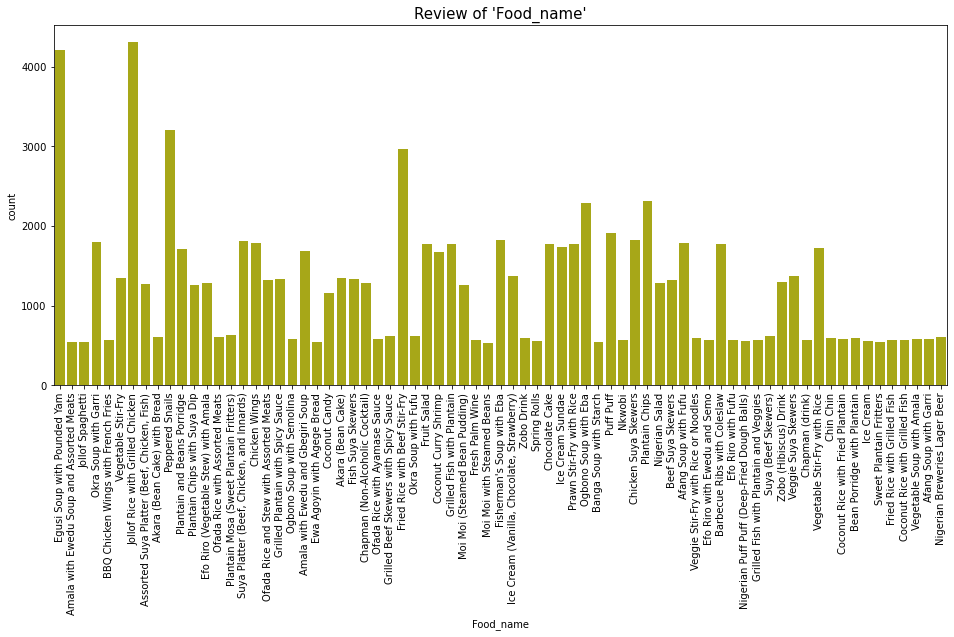

In [ ]:
data_1 = pd.concat([X_train, y_train], axis="columns")
plt.figure(figsize=(15, 6))
# Distribution of the target
sns.countplot(x=TARGET, data=data_1, color="y")
plt.title(f"Review of {TARGET!r}", size=15)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()